In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset_anuka.zip to dataset_anuka.zip


In [2]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataset_anuka.zip']), 'r')
data.extractall()

In [3]:
import os
import keras

In [4]:
dataset_anuka_dir = '/content/dataset_anuka'

In [5]:
input_shape = (100,100,3)

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(input_shape)),
    keras.layers.Dense(2, activation='sigmoid')
])

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 2)                 60002     
                                                                 
Total params: 60,002
Trainable params: 60,002
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(input_shape)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_3 (Dense)             (None, 12)                360012    
                                                                 
 dense_4 (Dense)             (None, 2)                 26        
                                                                 
Total params: 360,038
Trainable params: 360,038
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
epoch = 30

In [32]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, min_delta=1e-4)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4)

In [33]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
train_it = datagen.flow_from_directory('/content/dataset_anuka/train', batch_size=64, target_size=(100, 100))
validation_it = datagen.flow_from_directory('/content/dataset_anuka/val', batch_size=64, target_size=(100, 100))
test_it = datagen.flow_from_directory('/content/dataset_anuka/test', batch_size=64, target_size=(100, 100))

Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [23]:

# fit model
history = model1.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=epoch, 
      verbose=1,
      callbacks=[es, rlrop])

Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 1s 42ms/step - loss: 0.1801 - accuracy: 0.9255 - val_loss: 0.4299 - val_accuracy: 0.8708 - lr: 0.0010
Epoch 2/30
30/30 [==============================] - 1s 39ms/step - loss: 0.1722 - accuracy: 0.9380 - val_loss: 0.4322 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 3/30
30/30 [==============================] - 1s 39ms/step - loss: 0.1807 - accuracy: 0.9276 - val_loss: 0.4625 - val_accuracy: 0.8375 - lr: 0.0010
Epoch 4/30
30/30 [==============================] - 1s 40ms/step - loss: 0.1685 - accuracy: 0.9344 - val_loss: 0.4667 - val_accuracy: 0.8500 - lr: 0.0010
Epoch 5/30
30/30 [==============================] - 1s 40ms/step - loss: 0.1693 - accuracy: 0.9318 - val_loss: 0.4417 - val_accuracy: 0.8625 - lr: 0.0010
Epoch 6/30
30/30 [==============================] - 1s 40ms/step - loss: 0.1755 - accuracy: 0.9266 - val_l

In [34]:
history2 = model2.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=epoch, 
      verbose=1,      
      callbacks=[es, rlrop])

Epoch 1/30
30/30 [==============================] - 2s 43ms/step - loss: 0.3923 - accuracy: 0.8156 - val_loss: 0.3465 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 2/30
30/30 [==============================] - 1s 39ms/step - loss: 0.2736 - accuracy: 0.8844 - val_loss: 0.3016 - val_accuracy: 0.8917 - lr: 0.0010
Epoch 3/30
30/30 [==============================] - 1s 38ms/step - loss: 0.2521 - accuracy: 0.8984 - val_loss: 0.2877 - val_accuracy: 0.9208 - lr: 0.0010
Epoch 4/30
30/30 [==============================] - 1s 38ms/step - loss: 0.2116 - accuracy: 0.9182 - val_loss: 0.2431 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 5/30
30/30 [==============================] - 1s 38ms/step - loss: 0.1854 - accuracy: 0.9339 - val_loss: 0.2391 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 6/30
30/30 [==============================] - 1s 38ms/step - loss: 0.1639 - accuracy: 0.9406 - val_loss: 0.2940 - val_accuracy: 0.9083 - lr: 0.0010
Epoch 7/30
30/30 [==============================] - 1s 38ms/step - loss: 0.1

In [35]:
from matplotlib import pyplot
def summarize_diagnostics(history):
  # plot loss
  pyplot.figure(0)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  pyplot.legend(['loss','val_loss']) 

  # plot accuracy
  pyplot.figure(1)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  pyplot.legend(['accuracy','val_accuracy'])

In [36]:
#functions to build confusion matrix
from tqdm import tqdm
import os
import cv2
import numpy as np
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pyplot.figure(figsize = (6,6))
    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=90)
    pyplot.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.show()

IMG_SIZE = (100,100)
x_test, y_test, labels = load_data('/content/dataset_anuka/test/', IMG_SIZE)
print(labels)

100%|██████████| 2/2 [00:00<00:00, 69.94it/s]

240 images loaded from /content/dataset_anuka/test/ directory.
{0: 'Tipo A_ Kunzea', 1: 'Tipo B_ Lepto'}


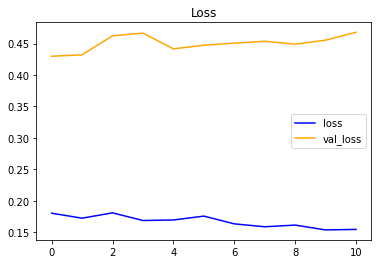

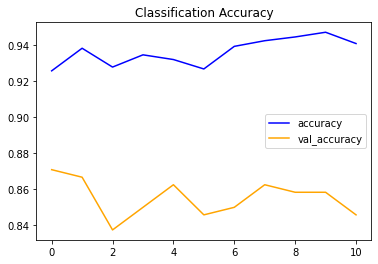

In [37]:
summarize_diagnostics(history)

In [16]:
classes = ['Tipo A_ Kunzea', 'Tipo B_ Lepto']

In [38]:
from sklearn.metrics import classification_report
def validateResults(model):   
  predictions = model.predict(x_test, batch_size=32)
  y_pred = np.argmax(predictions, axis=1) 
  y_true = np.argmax(y_test, axis=0)

  print("\n"+ classification_report(y_test, y_pred, target_names=classes))
  print(confusion_matrix(y_test, y_pred))
  confusion_mtx = confusion_matrix(y_test, y_pred)
  cm = plot_confusion_matrix(confusion_mtx, classes = list(labels.items()), normalize=False)


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.83      0.93      0.88       120
 Tipo B_ Lepto       0.92      0.81      0.86       120

      accuracy                           0.87       240
     macro avg       0.88      0.87      0.87       240
  weighted avg       0.88      0.87      0.87       240

[[112   8]
 [ 23  97]]


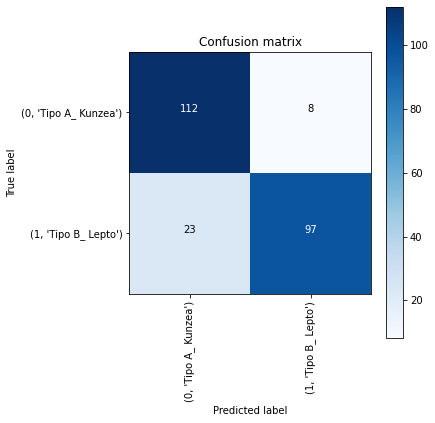

In [39]:
validateResults(model1)

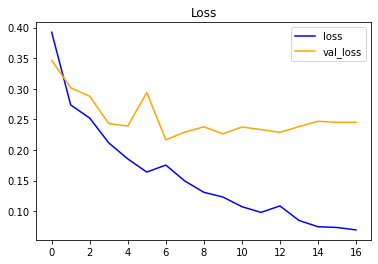

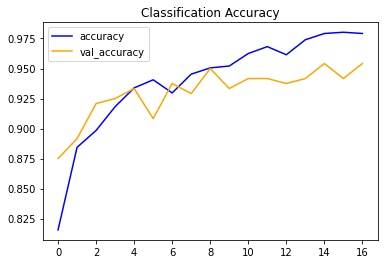

In [40]:
summarize_diagnostics(history2)


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.76      0.98      0.86       120
 Tipo B_ Lepto       0.98      0.68      0.80       120

      accuracy                           0.83       240
     macro avg       0.87      0.83      0.83       240
  weighted avg       0.87      0.83      0.83       240

[[118   2]
 [ 38  82]]


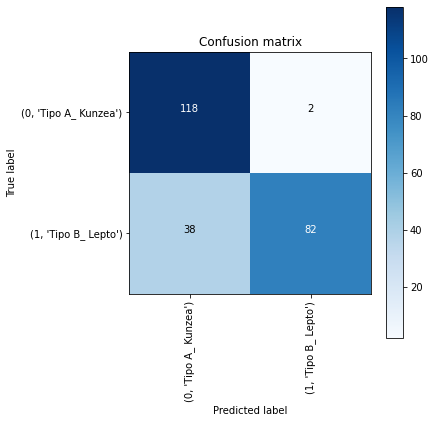

In [41]:
validateResults(model2)